# Heat pump installations in Switzerland #

## Data from the Swiss Federal Office of Energy ##
The Swiss Federal Office of Energy (SFOE) offers several sets of data that are constantly updated, and documentation about policy, energy efficiency and research. Some aspects covered by the datasets and documents include:
* overall energy statistics encompassing all forms of energy
* water levels of reservoirs for hydropower production
* electricity production, international trading, and consumption in Switzerland weekly updated
* production and consumption realted to renewable forms of energy (solar, wind, biomass, etc.)
* distribution of overall energy consumption
* model data of factors influencing energy consumption
* documentation of model based-climate adjustes estimates of energy consumption

# Describe the progression of heat pump technology #

Use data from the SFOE [electricity statistics](https://www.bfe.admin.ch/bfe/en/home/supply/statistics-and-geodata/energy-statistics/electricity-statistics.html) to get an impression about heat pumps in Switzerland. 

## Describe the trend in installations of heat pumps ##

In [56]:
import os, sys
import pandas as pd
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX




In [49]:
ddir ='.' # (!) set file name and directory
fn= 'Elektrowarmepumpe.xlsx'
fn=os.path.join(ddir,fn)
print(fn)

.\Elektrowarmepumpe.xlsx


In [99]:
df=pd.read_excel(fn,header=7)

In [31]:
df

,Année,Nombre d'installations,Puissance électrique,Puissance thermique,Consommation d'électricité,Chaleur renouvelable,Production de chaleur
0,NaN,-,MW,MW,GWh,GWh,GWh
1,1990,34863,277,818,504,785,1289
2,1991,36844,285,848,593,912,1505
3,1992,38486,290,870,568,897,1465
4,1993,40120,294,890,579,928,1507
5,1994,43074,303,928,545,903,1448
6,1995,45942,309,954,607,1005,1612
7,1996,48856,314,985,674,1117,1791
8,1997,52486,320,1017,614,1064,1678
9,1998,57053,329,1062,649,1148,1797


In [129]:
df2=df.iloc[1:37,:] # select rows that contain desired data
df2
df2.dropna()
# Rename the columns
df2.rename(columns={
    'Année': 'Year',
    'Nombre d\'installations': 'Installations',
    'Puissance électrique': 'Electric Power',
    'Puissance thermique': 'Thermal Power',
    'Consommation d\'électricité': 'Electric Consumption',
    'Chaleur renouvelable': 'Renewable Heat',
    'Production de chaleur': 'Heat Production'
}, inplace=True)
df2['Installations'] = pd.to_numeric(df2['Installations'], errors='coerce')
df2 = df2.dropna(subset=['Year', 'Installations'])
# Drop rows with NaN values in either 'Year' or 'Installations' column
df_clean = df2.dropna(subset=['Year', 'Installations'])

C:\Users\irmak\AppData\Local\Temp\ipykernel_35432\1240152632.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={
C:\Users\irmak\AppData\Local\Temp\ipykernel_35432\1240152632.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Installations'] = pd.to_numeric(df2['Installations'], errors='coerce')


In [5]:

def plot(x,y,xl,yl):
  plt.plot(x,y)
  plt.xlabel(xl)
  plt.ylabel(yl)

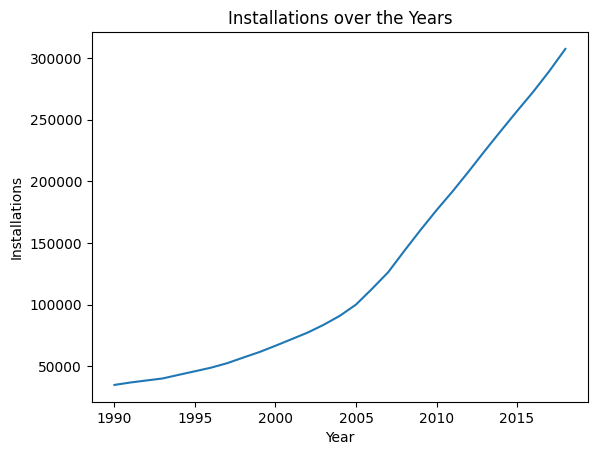

In [59]:
plt.plot(df_clean['Year'], df_clean['Installations'])

# Adding labels
plt.xlabel('Year')
plt.ylabel('Installations')
plt.title('Installations over the Years')

# Show the plot
plt.show()

## How will the installation of heat pumps trend up to year 2030? and year 2050? ##



In [130]:

df_clean.describe
df_clean.dropna()
df_clean.tail()
# Check the data types of the columns
print(df_clean.dtypes)
# Convert columns to numeric
df_clean['Electric Power'] = pd.to_numeric(df_clean['Electric Power'], errors='coerce')
df_clean['Thermal Power'] = pd.to_numeric(df_clean['Thermal Power'], errors='coerce')
df_clean['Electric Consumption'] = pd.to_numeric(df_clean['Electric Consumption'], errors='coerce')
df_clean['Renewable Heat'] = pd.to_numeric(df_clean['Renewable Heat'], errors='coerce')
df_clean['Heat Production'] = pd.to_numeric(df_clean['Heat Production'], errors='coerce')

# Check the data types again to make sure they are numeric
print(df_clean.dtypes)
print(df_clean)


Year                     object
Installations           float64
Electric Power           object
Thermal Power            object
Electric Consumption     object
Renewable Heat           object
Heat Production          object
dtype: object
Year                     object
Installations           float64
Electric Power            int64
Thermal Power             int64
Electric Consumption      int64
Renewable Heat            int64
Heat Production           int64
dtype: object
    Year  Installations  Electric Power  Thermal Power  Electric Consumption  \
1   1990        34863.0             277            818                   504   
2   1991        36844.0             285            848                   593   
3   1992        38486.0             290            870                   568   
4   1993        40120.0             294            890                   579   
5   1994        43074.0             303            928                   545   
6   1995        45942.0             309     

In [ ]:
# Split into training and testing sets
#df_clean['Year'] = pd.to_datetime(df_clean['Year'], format='%Y')
df_clean['Year'] = pd.to_datetime(df_clean['Year'], errors='coerce',format='%Y')
df_clean.set_index('Year', inplace=True)
df_clean = df_clean.sort_values('Year')


print(df_clean)

# Select the features (all columns except 'Installations')
X = df_clean[['Electric Power', 'Thermal Power', 'Electric Consumption', 'Renewable Heat', 'Heat Production']]
print(X)
# Select the target variable (Installations)
y = df_clean['Installations']

# Split the data into training and testing sets (80% train, 20% test)
# Split manually based on index position
split_point = int(len(df_clean) * 0.8)
X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]


X= sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
print(y_train.describe())
print(y_train.head(10))
print(y_train.nunique())




            Installations  Electric Power  Thermal Power  \
Year                                                       
1990-01-01        34863.0             277            818   
1991-01-01        36844.0             285            848   
1992-01-01        38486.0             290            870   
1993-01-01        40120.0             294            890   
1994-01-01        43074.0             303            928   
1995-01-01        45942.0             309            954   
1996-01-01        48856.0             314            985   
1997-01-01        52486.0             320           1017   
1998-01-01        57053.0             329           1062   
1999-01-01        61493.0             336           1100   
2000-01-01        66622.0             343           1140   
2001-01-01        71936.0             353           1188   
2002-01-01        77306.0             363           1236   
2003-01-01        83662.0             378           1297   
2004-01-01        90940.0             39

Looks like Electric Poweer and Thermal Power are significantly related to heat pump installations.  Electric power has a negative relationship that, one unit increase in electric power results in 841 unit decrease in electric pump installations, holding other variables constant. For thermal power, one unit increase result in 278 unit increase in heat pump installations. However, we know that our residuals are autocorrelated since we have data from each year. So time series analysis would fit better.

In [132]:
print(y.describe())
print(y_train.nunique())
print(y_train.describe())
print(X_train)

count        29.000000
mean     126215.413793
std       87343.611825
min       34863.000000
25%       52486.000000
50%       90940.000000
75%      191818.000000
max      307255.000000
Name: Installations, dtype: float64
23
count        23.000000
mean      89955.000000
std       53404.140333
min       34863.000000
25%       47399.000000
50%       71936.000000
75%      119543.500000
max      207975.000000
Name: Installations, dtype: float64
            Electric Power  Thermal Power  Electric Consumption  \
Year                                                              
1990-01-01             277            818                   504   
1991-01-01             285            848                   593   
1992-01-01             290            870                   568   
1993-01-01             294            890                   579   
1994-01-01             303            928                   545   
1995-01-01             309            954                   607   
1996-01-01           

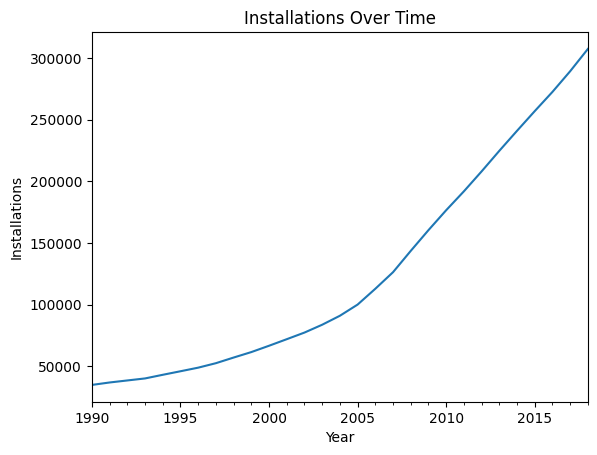

ADF Statistic: 1.1733844590117515
p-value: 0.9957967363286288
Critical Values:
	1%: -3.7238633119999998
	5%: -2.98648896
	10%: -2.6328004
The series is non-stationary.


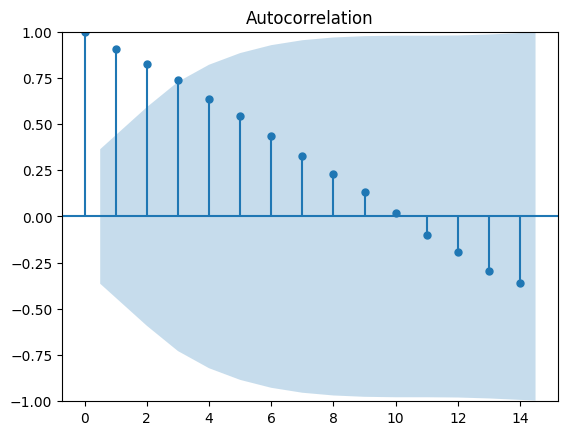

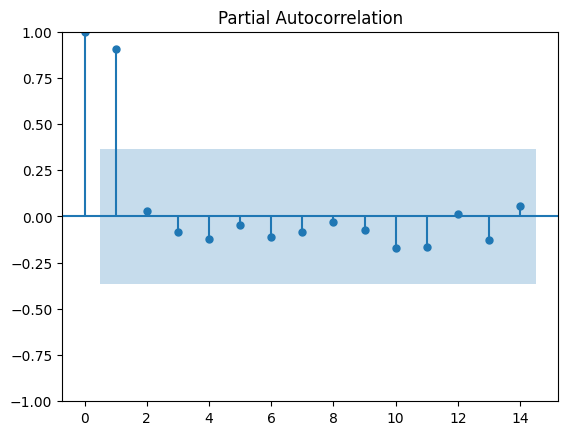

                               SARIMAX Results                                
Dep. Variable:          Installations   No. Observations:                   29
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -279.585
Date:                Tue, 06 May 2025   AIC                            565.169
Time:                        14:25:46   BIC                            569.166
Sample:                    01-01-1990   HQIC                           566.391
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9277      0.106      8.770      0.000       0.720       1.135
ma.L1         -0.6322      0.255     -2.482      0.013      -1.131      -0.133
sigma2      3.714e+07   2.48e-10    1.5e+17      0.0

c:\Users\irmak\Desktop\datascience\lulzern\.conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\irmak\Desktop\datascience\lulzern\.conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\irmak\Desktop\datascience\lulzern\.conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\irmak\Desktop\datascience\lulzern\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\irmak\Desk

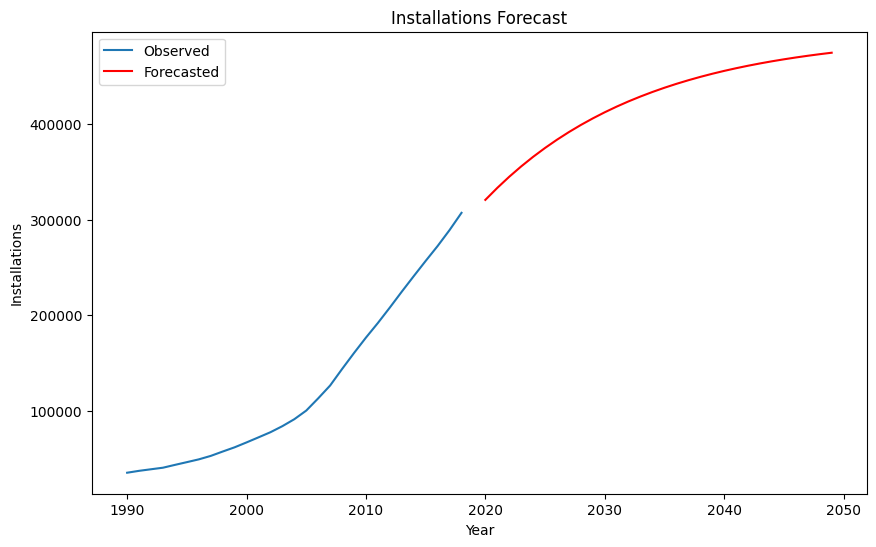

2019-01-01    320816.094960
2020-01-01    333396.561429
2021-01-01    345067.310513
2022-01-01    355894.125600
2023-01-01    365938.033159
2024-01-01    375255.646717
2025-01-01    383899.485971
2026-01-01    391918.272818
2027-01-01    399357.205983
2028-01-01    406258.215785
2029-01-01    412660.200483
2030-01-01    418599.245528
2031-01-01    424108.826964
2032-01-01    429220.000120
2033-01-01    433961.574652
2034-01-01    438360.276940
2035-01-01    442440.900724
2036-01-01    446226.446864
2037-01-01    449738.252985
2038-01-01    452996.113747
2039-01-01    456018.392419
2040-01-01    458822.124390
2041-01-01    461423.113185
2042-01-01    463836.019549
2043-01-01    466074.444078
2044-01-01    468151.003885
2045-01-01    470077.403715
2046-01-01    471864.501921
2047-01-01    473522.371666
2048-01-01    475060.357706
Freq: YS-JAN, Name: predicted_mean, dtype: float64


In [134]:

# Plot the data to visually check for trends
df_clean['Installations'].plot()
plt.title('Installations Over Time')
plt.xlabel('Year')
plt.ylabel('Installations')
plt.show()

# Step 1: Check if the data is stationary (Augmented Dickey-Fuller test)
def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value}")
    if result[1] > 0.05:
        print("The series is non-stationary.")
    else:
        print("The series is stationary.")

# Test stationarity for 'Installations'
test_stationarity(df_clean['Installations'])

# Step 2: If non-stationary, difference the series (d > 0)
df_clean['Installations_diff'] = df_clean['Installations'].diff().dropna()
df_clean['Installations_diff'] = df_clean['Installations'].diff().fillna(0)

# Step 3: Visualize ACF and PACF to determine p and q
plot_acf(df_clean['Installations_diff'].dropna())  # Autocorrelation
plot_pacf(df_clean['Installations_diff'].dropna())  # Partial autocorrelation
plt.show()

# Step 4: Fit the ARIMA model (choose p, d, q from the ACF/PACF plots)
# Example: ARIMA(1, 1, 1) — you can change (p, d, q) based on ACF/PACF analysis
model = ARIMA(df_clean['Installations'], order=(1, 1, 1))  # ARIMA(p=1, d=1, q=1)
model_fit = model.fit()



# Step 5: Check the model summary
print(model_fit.summary())

# Step 6: Forecasting
forecast_steps = 30  # Forecast the next 5 periods (e.g., years)
forecast = model_fit.forecast(steps=forecast_steps)
print(f"Forecasted Installations for the next {forecast_steps} periods: {forecast}")

# Step 7: Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df_clean['Installations'], label='Observed')
plt.plot(pd.date_range(df_clean.index[-1], periods=forecast_steps+1, freq='Y')[1:], forecast, label='Forecasted', color='red')
plt.title('Installations Forecast')
plt.xlabel('Year')
plt.ylabel('Installations')
plt.legend()
plt.show()

print(forecast)



Data is not stationary. Autocorrelation have a decreasing trend from 1 and PACF has a clear cut off at 1. ARIMA(1,1,1) used for the model.Then forecasted the next 30 years.

There is an increasing trend in heatpump installations. After 2028 there will be more than 400000 installations per year predicted by the model.

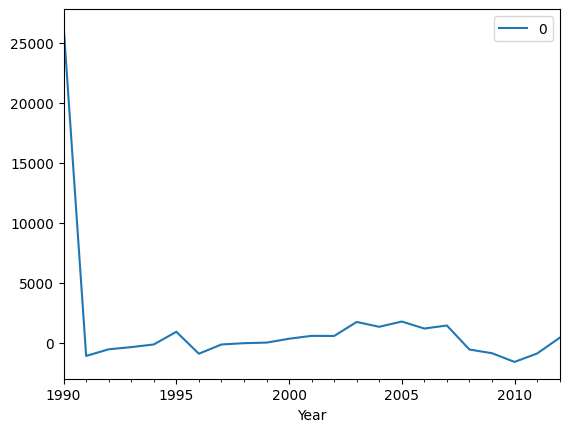

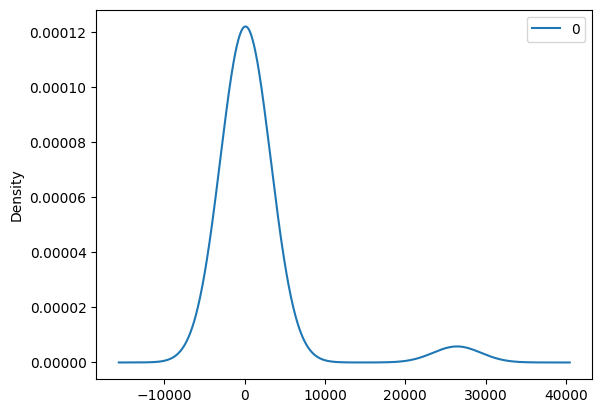

                  0
count     23.000000
mean    1265.338433
std     5567.178260
min    -1619.498487
25%     -574.627614
50%       -7.896612
75%     1032.062938
max    26431.535965


In [136]:
# plot residual erros
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

Residuals are centered around, seems good.

### Conclusion:

Installation of heat pumps seems to have an increasing trend and predicted to increase above 400000 installation per year from 2028 and so forth.